In [1]:
!pip install ultralytics roboflow

In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

Will's Dataset Wires and Poles Only

In [4]:
import requests
requests.packages.urllib3.disable_warnings()

import roboflow
rf = roboflow.Roboflow(api_key='LUfenSmTeCzCw24QScjY')

project = rf.workspace("powerlineobstructiondetection").project("poles-and-wires-only-2")
dataset = project.version(1).download("yolov8")
model = model = YOLO('yolov8n-seg.pt')

loading Roboflow workspace...
loading Roboflow project...


In [5]:
print(f"Dataset location: {dataset.location}")

Dataset location: /content/Poles-and-Wires-Only-2-1


In [6]:

model.train(
    data='/content/Poles-and-Wires-Only-2-1/data.yaml',
    epochs=50,
    imgsz=416,
    batch=4,
    device = 'gpu',
    amp=True
)

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:gpu (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Poles-and-Wires-Only-2-1/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=416, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/Poles-and-Wires-Only-2-1/train/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Poles-and-Wires-Only-2-1/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.539G       2.42      4.651      3.275      1.972         16        416: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          2         29     0.0179      0.246     0.0344     0.0153    0.00366      0.121    0.00253   0.000493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.516G      2.285      3.835      2.684      1.813         42        416: 100%|██████████| 32/32 [00:06<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all          2         29      0.984      0.234      0.264       0.14    0.00751      0.183    0.00868    0.00158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.499G      2.283      3.621      2.467      1.816         22        416: 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          2         29      0.372      0.241      0.192      0.137    0.00217     0.0417    0.00165   0.000373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.497G      2.338      3.655      2.368      1.807         17        416: 100%|██████████| 32/32 [00:06<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all          2         29        0.5      0.188      0.229      0.136     0.0108     0.0417    0.00261   0.000556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.526G      2.254      3.557      2.266      1.809         20        416: 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          2         29      0.464      0.183      0.222     0.0855     0.0278     0.0625     0.0105    0.00138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.528G       2.19      3.481      2.182      1.747         50        416: 100%|██████████| 32/32 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.73it/s]

                   all          2         29      0.379      0.163      0.222      0.094     0.0927     0.0208    0.00943    0.00255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.499G      2.237      3.473      2.167      1.782         29        416: 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          2         29      0.473      0.163        0.2     0.0901     0.0155     0.0417    0.00238   0.000593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      0.52G      2.143      3.492      2.154       1.75         20        416: 100%|██████████| 32/32 [00:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          2         29      0.335       0.32      0.135     0.0425      0.178     0.0208      0.017    0.00193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.522G      2.063      3.303      2.034      1.711         44        416: 100%|██████████| 32/32 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all          2         29      0.584      0.121       0.17     0.0515       0.37     0.0208      0.028    0.00542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.518G      2.147       3.42      2.039      1.756         71        416: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all          2         29      0.316      0.246      0.184     0.0709      0.726     0.0208     0.0195    0.00592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.516G      2.142      3.389      2.042      1.726         26        416: 100%|██████████| 32/32 [00:07<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all          2         29      0.295      0.163      0.148     0.0707      0.654     0.0208     0.0134    0.00723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.518G      2.004      3.284      2.007      1.675         17        416: 100%|██████████| 32/32 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]

                   all          2         29      0.563      0.163      0.205      0.105      0.107     0.0417     0.0174    0.00482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.512G      2.019      3.253      1.959      1.658         38        416: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all          2         29      0.292      0.263      0.254      0.133      0.219     0.0625     0.0486    0.00657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.512G      2.004      3.265      1.923      1.641         26        416: 100%|██████████| 32/32 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.61it/s]

                   all          2         29      0.452      0.258      0.261      0.151      0.135     0.0417     0.0404       0.01



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.524G      1.921      3.238      1.878      1.598         40        416: 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          2         29       0.52      0.183      0.228      0.129     0.0804     0.0417     0.0183     0.0031



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.522G      1.938      3.245      1.885      1.608         33        416: 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all          2         29      0.574      0.163      0.201      0.142      0.726     0.0417      0.027    0.00503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      0.51G      1.892      3.177      1.807       1.58         18        416: 100%|██████████| 32/32 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all          2         29      0.527      0.163      0.222      0.115      0.216     0.0417     0.0379      0.013



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.528G      1.973      3.128        1.9      1.594         47        416: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]

                   all          2         29      0.463      0.142      0.209     0.0774      0.445     0.0417     0.0507     0.0125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.549G      1.931      3.135      1.845      1.618         47        416: 100%|██████████| 32/32 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          2         29      0.514      0.163       0.21     0.0954      0.654     0.0417     0.0356    0.00826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.518G      1.864      3.161      1.806      1.578         27        416: 100%|██████████| 32/32 [00:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]

                   all          2         29      0.534      0.163      0.217      0.109       0.83     0.0408      0.031    0.00601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.514G      1.872      3.156      1.819      1.585         32        416: 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          2         29      0.301      0.266      0.246      0.132      0.223     0.0417     0.0256    0.00785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.537G      1.828      3.053      1.751      1.575         37        416: 100%|██████████| 32/32 [00:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

                   all          2         29       0.31       0.31      0.266       0.15       0.23     0.0417     0.0395     0.0174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.524G       1.85      3.089      1.755       1.54         23        416: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all          2         29      0.767      0.161      0.177      0.114       0.22     0.0417     0.0274    0.00977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.522G      1.803      3.038      1.746      1.566         26        416: 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all          2         29      0.487      0.183      0.187     0.0856       0.19     0.0833     0.0529     0.0116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.549G      1.819      3.087      1.747      1.538         25        416: 100%|██████████| 32/32 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          2         29      0.384      0.277       0.24      0.126      0.351     0.0625     0.0512     0.0186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.516G      1.736      3.046      1.706      1.505         41        416: 100%|██████████| 32/32 [00:08<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


                   all          2         29      0.406        0.3      0.255      0.142      0.218      0.183     0.0902     0.0157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.518G      1.789      3.011      1.732      1.538         15        416: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all          2         29      0.311      0.346      0.264      0.159      0.162      0.183     0.0912      0.023



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.526G      1.694      2.931      1.673      1.476         37        416: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all          2         29       0.41      0.318      0.271      0.147      0.184      0.127     0.0812     0.0147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.533G      1.696      2.943      1.631      1.471         55        416: 100%|██████████| 32/32 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all          2         29      0.567      0.249      0.277      0.145      0.328     0.0417     0.0466     0.0072



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.556G      1.814      3.064      1.656        1.5         46        416: 100%|██████████| 32/32 [00:08<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all          2         29      0.581      0.163      0.248      0.138      0.366     0.0417     0.0474    0.00968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      0.51G      1.683        2.9      1.585      1.446         61        416: 100%|██████████| 32/32 [00:09<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all          2         29      0.601      0.163      0.254      0.165      0.269     0.0625     0.0611     0.0134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.533G      1.687      2.909      1.576      1.448         15        416: 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]


                   all          2         29      0.607      0.163      0.259      0.164      0.241     0.0625     0.0781     0.0165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.516G      1.715      2.954      1.634      1.485         30        416: 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all          2         29      0.193      0.287      0.251       0.15      0.247     0.0625     0.0789     0.0153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.524G      1.659      2.857      1.582       1.45         29        416: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all          2         29      0.423      0.163      0.241      0.144       0.12     0.0625     0.0582     0.0133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.516G      1.692      2.935      1.565      1.434         40        416: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all          2         29      0.628      0.163      0.257       0.13      0.234     0.0625     0.0459      0.012



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.524G      1.761      2.926      1.542      1.476         42        416: 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          2         29       0.28      0.287      0.261      0.138      0.223     0.0625     0.0702     0.0166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      0.51G      1.626      2.903      1.524      1.412         35        416: 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          2         29       0.57      0.163      0.245      0.138      0.241     0.0625     0.0814     0.0166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.505G      1.611      2.842      1.509      1.444         27        416: 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          2         29      0.649      0.163      0.248      0.158      0.231     0.0625     0.0782     0.0231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.508G      1.653       2.94      1.527      1.439         27        416: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all          2         29      0.308       0.25      0.264      0.164      0.818     0.0417     0.0812     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.545G      1.564      2.747      1.488      1.411         34        416: 100%|██████████| 32/32 [00:07<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          2         29      0.293      0.388      0.274      0.175      0.886     0.0417     0.0797     0.0328


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.476G      1.713      2.739      1.808      1.536         28        416: 100%|██████████| 32/32 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

                   all          2         29      0.353      0.325      0.288      0.165      0.158      0.178      0.115     0.0344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.453G      1.731       2.72      1.777      1.532         22        416: 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all          2         29      0.366      0.325       0.27      0.156      0.183      0.163      0.103     0.0249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.468G      1.693      2.715      1.703      1.494         51        416: 100%|██████████| 32/32 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all          2         29       0.25      0.325       0.27      0.157      0.142      0.183      0.102     0.0295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.455G      1.652      2.629      1.703      1.496         27        416: 100%|██████████| 32/32 [00:05<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all          2         29      0.606      0.304      0.304      0.165      0.447     0.0625     0.0979     0.0219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.455G      1.627      2.711      1.684      1.485         14        416: 100%|██████████| 32/32 [00:07<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


                   all          2         29      0.517      0.304      0.286      0.157      0.071      0.143     0.0611     0.0189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.453G      1.609      2.652      1.656      1.483         24        416: 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          2         29       0.37      0.304      0.264      0.152     0.0624      0.163     0.0603     0.0192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.457G      1.613       2.61      1.628      1.454         27        416: 100%|██████████| 32/32 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          2         29      0.408      0.304      0.264      0.152      0.192      0.142     0.0727     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.455G      1.595      2.588      1.611      1.447         26        416: 100%|██████████| 32/32 [00:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]

                   all          2         29      0.351      0.312      0.289      0.158      0.198      0.142     0.0758     0.0234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.476G      1.576      2.563      1.569      1.468         23        416: 100%|██████████| 32/32 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all          2         29      0.485      0.325      0.307      0.169      0.138      0.127      0.085     0.0288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.476G       1.56       2.64      1.593      1.449         21        416: 100%|██████████| 32/32 [00:06<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          2         29      0.498      0.325        0.3      0.155     0.0566      0.204     0.0713     0.0241



50 epochs completed in 0.124 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:gpu (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]


                   all          2         29      0.294      0.388      0.273      0.175      0.886     0.0417     0.0792     0.0328
                 poles          2          5      0.379        0.4      0.337      0.228          1          0     0.0493     0.0134
                 wires          2         24      0.209      0.375       0.21      0.122      0.772     0.0833      0.109     0.0522
Speed: 0.3ms preprocess, 14.1ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/segment/train3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79f253f8d890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

In [7]:
metrics = model.val()  # This will evaluate the model on the validation dataset

# Print the results
print("Validation Metrics:")

# Access results_dict to get a dictionary of all metrics
results = metrics.results_dict

# Print all metrics
for metric, value in results.items():
    print(f"{metric}: {value}")

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:gpu (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/Poles-and-Wires-Only-2-1/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


                   all          2         29      0.296      0.388      0.274      0.175      0.885     0.0417     0.0791     0.0327
                 poles          2          5      0.379        0.4      0.337      0.228          1          0     0.0496     0.0133
                 wires          2         24      0.213      0.375       0.21      0.122       0.77     0.0833      0.109     0.0522
Speed: 0.5ms preprocess, 73.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/train32
Validation Metrics:
metrics/precision(B): 0.29586763421106954
metrics/recall(B): 0.3875
metrics/mAP50(B): 0.27365172091909906
metrics/mAP50-95(B): 0.17517379514516326
metrics/precision(M): 0.8852279938987767
metrics/recall(M): 0.041666666666666664
metrics/mAP50(M): 0.07910274005876605
metrics/mAP50-95(M): 0.0327322642491983
fitness: 0.22239089955271193


In [8]:
import cv2
import glob
import os
import numpy as np

image_folder = "/content/Poles-and-Wires-Only-2-1/test/images/"
output_folder = "/content/Annotated/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Class-to-color mapping
class_colors = {
    5: (0, 255, 255),       # Yellow
    1: (0, 255, 0),         # Green
    0: (0, 0, 255)          # Red
}

class_names = {
    5: 'poles',
    0: 'obstruction',
    1.0: 'wires'
}

def letterbox(image, target=416):
    h, w = image.shape[:2]
    scale = min(target/h, target/w)
    new_h, new_w = int(h*scale), int(w*scale)
    resized = cv2.resize(image, (new_w, new_h))
    dh, dw = target - new_h, target - new_w
    return cv2.copyMakeBorder(resized, 0, dh, 0, dw, cv2.BORDER_CONSTANT)

# Get all image file paths
image_paths = glob.glob(f"{image_folder}*.jpg")  # Adjust the file extension if needed

# Iterate through each image
for path in image_paths:
    # Read the image
    image = cv2.imread(path)
    image = letterbox(image, target=416)  # Resize to 416x416 with letterboxing

    results = model.predict(image)[0]

    if results.masks is not None:
        masks = results.masks.data.cpu().numpy()
        class_ids = results.boxes.cls.cpu().numpy()
        confidences = results.boxes.conf.cpu().numpy()

        # Draw segmentation masks
        for mask, class_id, conf in zip(masks, class_ids, confidences):
            # Resize mask to 416x416
            mask = cv2.resize((mask > 0.5).astype("uint8"), (416, 416), interpolation=cv2.INTER_NEAREST)

            # Get color for current class
            color = class_colors.get(class_id, (255, 255, 255))

            # Create colored mask
            colored_mask = np.zeros((416, 416, 3), dtype=np.uint8)
            for i in range(3):
                colored_mask[:, :, i] = mask * color[i]

            # Blend mask with image
            image = cv2.addWeighted(image, 1, colored_mask, 0.5, 0)

            # Add text label
            y, x = np.where(mask > 0)
            if len(y) > 0 and len(x) > 0:
                label = f"{class_names[class_id]} ({conf*100:.1f}%)"
                cv2.putText(image, label,
                            (int(x.mean()), int(y.mean())),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, color, 1)

    # Save the annotated image
    output_path = os.path.join(output_folder, os.path.basename(path))
    cv2.imwrite(output_path, image)

print(f"Annotated images saved to: {output_folder}")



0: 416x416 9 wiress, 13.5ms
Speed: 2.4ms preprocess, 13.5ms inference, 8.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 3 poless, 4 wiress, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 6.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 8 wiress, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 10.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 poles, 14 wiress, 23.5ms
Speed: 1.8ms preprocess, 23.5ms inference, 10.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 poless, 8 wiress, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 5.9ms postprocess per image at shape (1, 3, 416, 416)
Annotated images saved to: /content/Annotated/


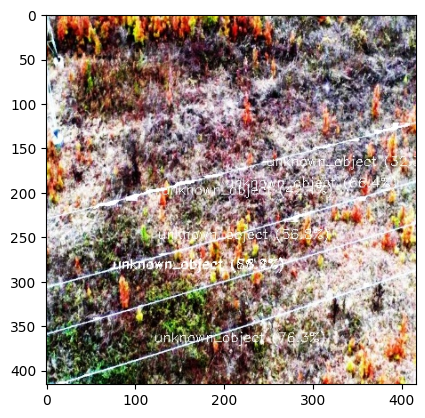

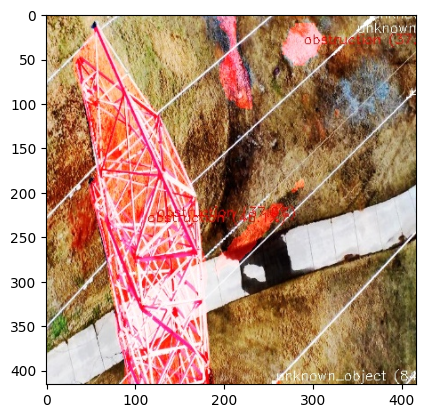

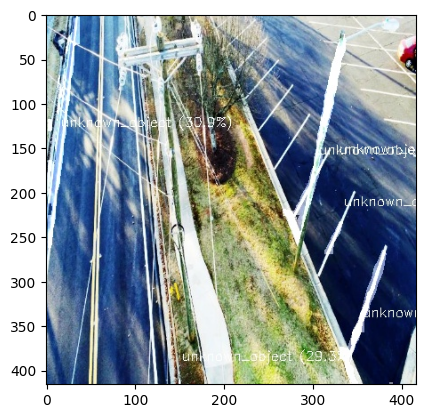

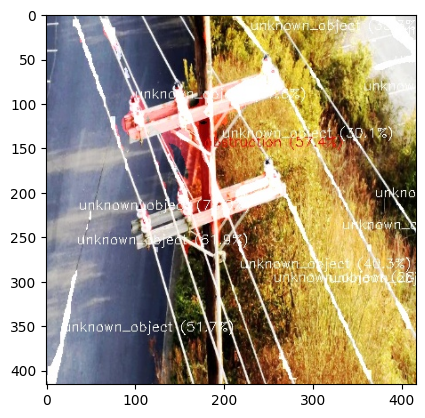

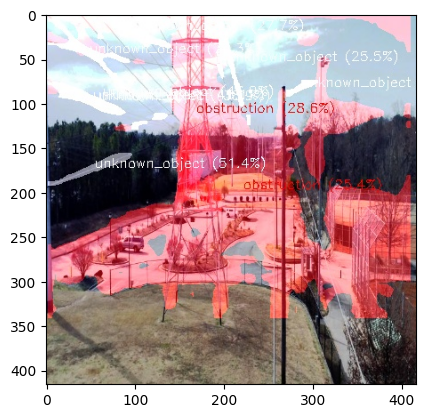

In [9]:
import matplotlib.pyplot as plt

image_paths = glob.glob(f"{'/content/Annotated2/'}*.jpg")  # Adjust the file extension if needed

# Iterate through each image
for path in image_paths:
    image_pixels = plt.imread(path)
    plt.imshow(image_pixels)
    plt.show()